In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
x_train = tf.keras.utils.normalize(x_train,axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)

In [5]:
print(x_train.shape,x_test.shape)

(60000, 28, 28) (10000, 28, 28)


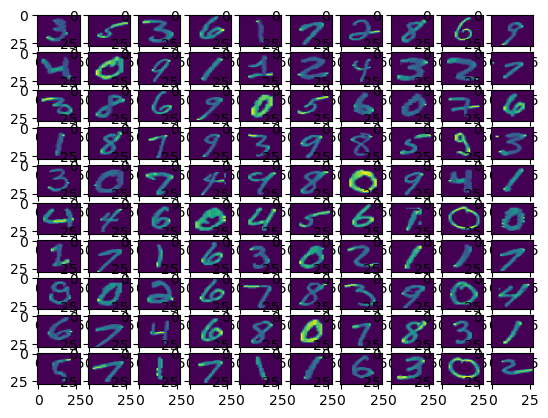

In [6]:
fig,ax = plt.subplots(10,10)
k = 10
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28,28),
                       aspect = 'auto')
        k+=1
plt.show()

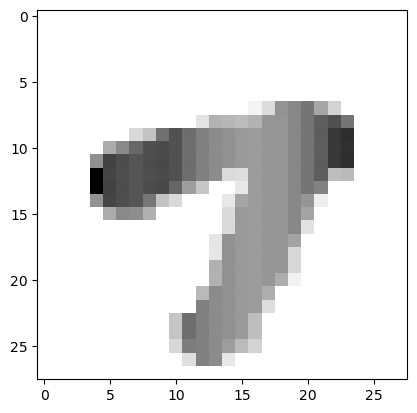

In [7]:
def draw(n):
    plt.imshow(n,cmap = plt.cm.binary)
    plt.show()
draw(x_train[7889])

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [9]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))

# reshape

model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [10]:
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [11]:
model.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2581 - accuracy: 0.9243
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1038 - accuracy: 0.9682
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0714 - accuracy: 0.9772
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0519 - accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0416 - accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0312 - accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0256 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0212 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0185 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.01

In [12]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print("loss-->",val_loss,"\nacc-->",val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1151 - accuracy: 0.9752
loss--> 0.11509685218334198 
acc--> 0.9751999974250793


313/313 [==============================] - 1s 3ms/step
label ->  3
prediction ->  3


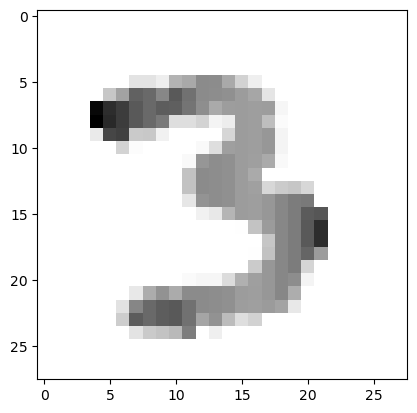

In [13]:
predictions=model.predict([x_test])
print('label -> ',y_test[500])
print('prediction -> ',np.argmax(predictions[500]))
 
draw(x_test[500])

313/313 [==============================] - 1s 2ms/step
label ->  4
prediction ->  4


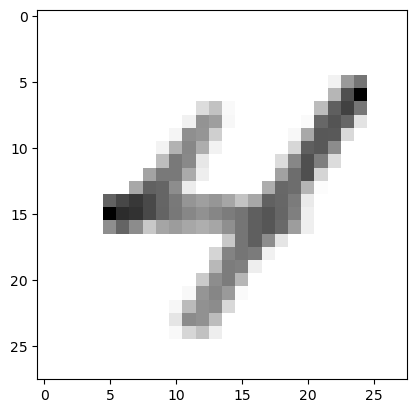

In [14]:
predictions=model.predict([x_test])
print('label -> ',y_test[8989])
print('prediction -> ',np.argmax(predictions[8989]))
 
draw(x_test[8989])

In [15]:
model.save('E:\Datasets\Deep Learning Model\epic_num_reader.h5')

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
new_model = tf.keras.models.load_model('E:\\Datasets\\Deep Learning Model\\epic_num_reader.h5')

313/313 [==============================] - 1s 3ms/step
label-> 2
prediction-> 2


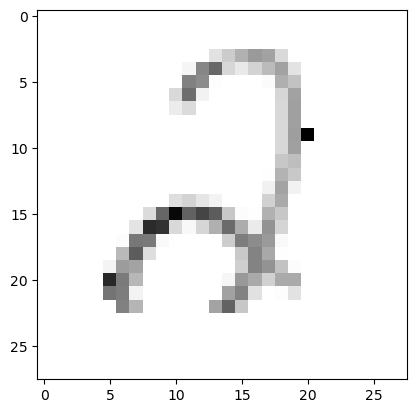

In [17]:
prediction = new_model.predict([x_test])
print("label->",y_test[830])
print("prediction->",np.argmax(predictions[830]))
draw(x_test[830])

In [18]:
import cv2 as cv

In [24]:
img = cv.imread("WhatsApp Image 2023-09-19 at 2.35.39 PM.jpeg")

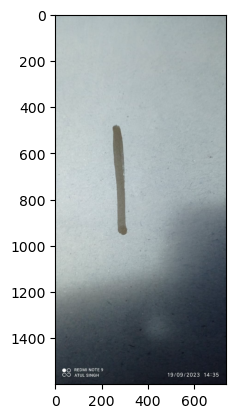

In [25]:
plt.imshow(img)

In [26]:
prediction = new_model.predict([x_test])
print("label->",y_test[img])
print("prediction->",np.argmax(predictions[img]))
#draw(x_test[img])

313/313 [==============================] - 1s 2ms/step
label-> [[[2 5 1]
  [7 0 1]
  [1 1 1]
  ...
  [7 6 3]
  [7 6 4]
  [7 6 4]]

 [[2 5 1]
  [2 5 1]
  [7 0 1]
  ...
  [7 6 3]
  [7 6 4]
  [7 6 4]]

 [[3 2 0]
  [2 5 1]
  [7 0 1]
  ...
  [7 6 3]
  [7 6 4]
  [7 6 4]]

 ...

 [[2 4 5]
  [1 4 5]
  [1 2 6]
  ...
  [9 6 4]
  [9 6 3]
  [9 6 3]]

 [[1 4 5]
  [1 4 5]
  [7 4 6]
  ...
  [3 9 1]
  [4 6 1]
  [4 6 1]]

 [[1 4 5]
  [1 4 5]
  [1 4 0]
  ...
  [7 4 3]
  [4 6 1]
  [4 6 1]]]
prediction-> 40


313/313 [==============================] - 1s 2ms/step
label-> 1
prediction-> 1


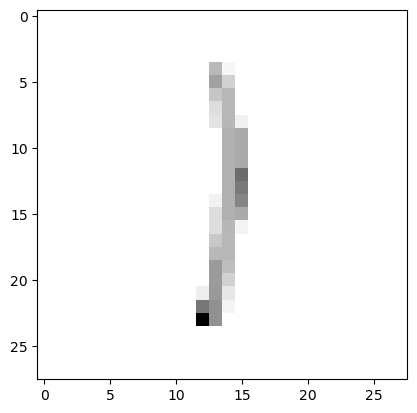

In [27]:
prediction = new_model.predict([x_test])
print("label->",y_test[40])
print("prediction->",np.argmax(predictions[40]))
draw(x_test[40])